In [1]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [2]:
train = pd.read_csv('IMFDB_final\\dataset part1.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,Image,Emotion
0,Gajarajayogam_Mamukkoya_1.jpg,DISGUST
1,Gajarajayogam_Mamukkoya_11.jpg,HAPPINESS
2,Gajarajayogam_Mamukkoya_12.jpg,HAPPINESS
3,Gajarajayogam_Mamukkoya_13.jpg,HAPPINESS
4,Gajarajayogam_Mamukkoya_14.jpg,HAPPINESS


In [3]:
train.columns

Index(['Image', 'Emotion'], dtype='object')

In [4]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('C:\\Users\\minij\\Desktop\\Emotion Detection\\IMFDB_final\\images\\'+str(train['Image'][i]),target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|████████████████████████████████████████████████████████████████████████████████| 449/449 [00:10<00:00, 42.91it/s]


In [5]:
X.shape

(449, 224, 224, 3)

In [6]:
from keras.utils import to_categorical
y = train.drop(['Image'],axis=1)
y.shape
le=LabelEncoder()
ds=y.apply(le.fit_transform)
y=np.array(ds)
print(np.unique(y))
print(le.inverse_transform([0,1,2,3,4,5]))
y=to_categorical(y)
print(y.shape)

[0 1 2 3 4 5]
['ANGER' 'DISGUST' 'HAPPINESS' 'NEUTRAL' 'SADNESS' 'SURPRISE']
(449, 6)


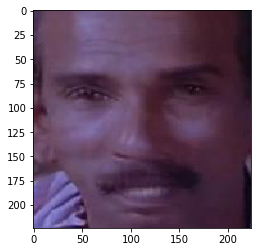

In [7]:
plt.imshow(X[2])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

#CNN without LSTM
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

#CNN with LSTM
from keras.layers import LSTM
from keras.layers import TimeDistributed
model = Sequential()
model.add(TimeDistributed(Conv2D(filters=16, kernel_size=(5, 5), activation="relu")))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Dropout(0.25)))
model.add(TimeDistributed(Conv2D(filters=32, kernel_size=(5, 5), activation='relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Dropout(0.25)))
model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(5, 5), activation="relu")))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Dropout(0.25)))
model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(5, 5), activation='relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Dropout(0.25)))
model.add(TimeDistributed(Flatten()))
model.add(TimeDistributed(Dense(128, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(Dense(64, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(Dense(7, activation='softmax')))
model.add(LSTM(50, activation='relu', stateful=True, return_sequences=True))
#model.add(LSTM(10, stateful=True))
model.add(Dense(7, activation='softmax'))

In [10]:
#VGG16
from keras.applications.vgg16 import VGG16
model = Sequential()
model.add(VGG16(include_top='False', input_shape=(224,224,3)))
#model.add(Flatten())
model.add(Dense(256, activation='softmax'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))
#model.add(Dense(7, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1000)              138357544 
_________________________________________________________________
dense_2 (Dense)              (None, 256)               256256    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 1542      
Total params: 138,615,342
Trainable params: 138,615,342
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)
#model.fit(X_train, y_train, epochs=10, batch_size=16)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 404 samples, validate on 45 samples
Epoch 1/10


In [ ]:
#model.save('my_model.h5')

In [16]:
model.evaluate(X_test, y_test)

ValueError: Error when checking target: expected dense_3 to have shape (7,) but got array with shape (6,)

In [17]:
img = image.load_img('C:\\Users\\minij\\Desktop\\Emotion Detection\\IMFDB_final\\images\\Aaradhana_RajeshKhanna_102.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

In [18]:
#classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
print(proba)

[[0.15281889 0.1399195  0.14300057 0.1317609  0.1384236  0.15455557
  0.13952088]]
